<a href="https://colab.research.google.com/github/michellechen202212/udacity-datascience/blob/main/blog_post.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: Data Science Blog Post

This notebook is part of a Data Science Blog Post project and leverages the CRISP-DM framework to analyze the [Business Formation Statistics Weekly Data](https://www.census.gov/econ/bfs/csv/bfs_us_apps_weekly_nsa.csv). It provides a comprehensive exploration of the dataset, addressing key business-related questions and uncovering actionable insights.

###Key Components:

**Introduction:**
This project tackles specific business-focused questions by identifying important features, uncovering creative insights, and exploring predictions in hypothetical scenarios using data science methodologies.

**Business Understanding:**
The dataset offers valuable insights into U.S. entrepreneurial activity, helping stakeholders like economists and policymakers monitor trends and assess the economic landscape.

**Data Understanding: **
Features such as HBA_NSA (High-Propensity Applications), Year, and WBA_NSA (Applications with Planned Wages) are analyzed for their impact on predicting total business activity. These features are classified into categories based on their influence (major, moderate, or secondary).

**Exploratory Analysis and Feature Insights:**
Key drivers such as HBA_NSA and Year are highlighted for their significant role in predictions. Seasonal and annual trends are explored to add further context to business application patterns.

**Modeling and Predictions:**
The notebook evaluates model performance in both average and hypothetical scenarios:

Linear Regression: Shows high sensitivity to feature changes, making it effective for simple linear relationships.
Random Forest: Captures complex, non-linear interactions, offering balanced and realistic predictions.

### Questions Addressed:

**Feature Importance:**
What are the most significant features in the dataset, what do they represent, and how do they influence the predictions?

**Creative Insights:**
What unique or creative insights can be derived from the dataset?

**Model Accuracy:**
How accurate is the trained model in predicting the outcomes?

**Predictive Scenarios:**
What would happen in a creative predictive scenario using the trained model?


## Business Understanding:

The Business Formation Statistics (BFS) Weekly Data tracks trends in business applications across national, regional, and state levels, providing critical insights into U.S. entrepreneurial activity. Reviewed under strict data integrity and confidentiality standards, this dataset transitioned to monthly releases in September 2024, consolidating weekly estimates for improved accessibility. By analyzing Not Seasonally Adjusted Business Applications, the data offers near-real-time monitoring of economic trends, policy impacts, and regional business growth. Economists, policymakers, and analysts can leverage this resource to assess the health of the business ecosystem, forecast economic outcomes, and shape strategies to support entrepreneurship and economic development nationwide.


##Data Understanding:
The dataset features are clearly described, including HBA_NSA, WBA_NSA, and others, along with their significance.


# Modularized Predictive Modeling Notebook

This notebook demonstrates a modular approach to predictive modeling using the provided dataset.
It includes separate functions for data loading, preparation, training, evaluation, and visualization.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
def load_data(file_path):
    """
    Loads the dataset from the given file path.

    Args:
    - file_path (str): Path to the CSV file.

    Returns:
    - pd.DataFrame: Loaded dataset.
    """
    return pd.read_csv(file_path)

def analyze_data(data, target_column):
    """
    Analyzes the dataset and prepares it for modeling by splitting into features and target.

    This function displays basic information about the dataset, including shape, data types,
    missing values, and summary statistics. It also separates the target variable from
    the features for modeling.

    Args:
    - data (pd.DataFrame): The dataset.
    - target_column (str): The name of the target column.

    Returns:
    - X (pd.DataFrame): Features (independent variables).
    - y (pd.Series): Target variable (dependent variable).
    """
    # Dataset Information
    print("Dataset Information:")
    print(data.info())
    print("\nDataset Shape:", data.shape)

    # Check for Missing Values
    missing_values = data.isnull().sum()
    if missing_values.any():
        print("\nMissing Values:")
        print(missing_values[missing_values > 0])
    else:
        print("\nNo missing values in the dataset.")

    # Summary Statistics (excluding the target column)
    print("\nSummary Statistics (excluding the target column):")
    print(data.drop(columns=[target_column]).describe())

# Example workflow for data understanding
if __name__ == "__main__":
    # Load dataset
    file_path = 'sample_data/bfs_us_apps_weekly_nsa.csv'
    data = load_data(file_path)

    # Define target column
    target_column = 'BA_NSA'

    # Analyze dataset
    analyze_data(data, target_column)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        986 non-null    int64  
 1   Week        986 non-null    int64  
 2   BA_NSA      986 non-null    int64  
 3   HBA_NSA     986 non-null    int64  
 4   WBA_NSA     986 non-null    int64  
 5   CBA_NSA     986 non-null    int64  
 6   YY_BA_NSA   932 non-null    float64
 7   YY_HBA_NSA  932 non-null    float64
 8   YY_WBA_NSA  932 non-null    float64
 9   YY_CBA_NSA  932 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 77.2 KB
None

Dataset Shape: (986, 10)

Missing Values:
YY_BA_NSA     54
YY_HBA_NSA    54
YY_WBA_NSA    54
YY_CBA_NSA    54
dtype: int64

Summary Statistics (excluding the target column):
              Year        Week       HBA_NSA       WBA_NSA       CBA_NSA  \
count   986.000000  986.000000    986.000000    986.000000    986.000000   


### What are the most important features of the data set, what do they mean, and how do they drive the predicted outcome?

**1. High-Propensity Applications (HBA_NSA)**
- **What It Means**: Business applications likely to succeed, hire employees, and contribute to economic growth.
- **How It Drives Predictions**: The most significant feature, heavily influencing predictions as these applications represent a large portion of total business activity.


**2. Year**
- **What It Means**: Tracks long-term economic trends such as booms or recessions.
- **How It Drives Predictions**: A major driver, providing context for increases or decreases in business activity over time.


**3. Applications with Planned Wages (WBA_NSA)**
- **What It Means**: Indicates businesses planning to hire employees and establish payroll.
- **How It Drives Predictions**: Moderately influences predictions by reflecting entrepreneurial confidence and labor market intentions.


**4. Corporation Applications (CBA_NSA)**
- **What It Means**: Applications to form corporations, representing larger and more formal business ventures.
- **How It Drives Predictions**: Adds depth by highlighting trends in formalized business activity.

**5. Yearly Changes (YY Metrics)**
- **What It Means**: Tracks annual growth or decline in specific types of business applications.
- **How It Drives Predictions**: Provides additional context for trends but has a smaller overall impact.


**6. Week**
- **What It Means**: Reflects seasonal patterns in business applications, such as busy periods at the start of the year.
- **How It Drives Predictions**: Plays a minor role, fine-tuning predictions with seasonal trends.

**Summary of Key Drivers**

- **Major Influences**:  
  - **HBA_NSA**: Dominates predictions due to its strong relationship with total business activity.  
  - **Year**: Captures long-term economic trends, shaping the overall prediction.

- **Moderate Influences**:  
  - **WBA_NSA** and **CBA_NSA**: Add valuable details about hiring plans and formal business ventures.

- **Secondary Influences**:  
  - **YY Metrics** and **Week**: Provide additional nuance by capturing annual and seasonal trends but have less impact.

By focusing on these key features, the model can provide accurate and meaningful predictions for total business applications.



## Data Preparation:

**Data Cleaning and Missing Values Handling Strategy**
- Numerical columns with missing values were imputed using the mean strategy. This approach is suitable for maintaining data consistency, especially when the missing values are not heavily skewed.
- Alternative strategies, such as median imputation, could be used for skewed data, while KNN imputation may be considered for datasets with complex relationships between features.
- For this dataset, the mean was chosen for its simplicity and effectiveness in maintaining the dataset's overall statistical properties.
- This dataset does not contain any categorical data.


Initial missing values:
Year           0
Week           0
BA_NSA         0
HBA_NSA        0
WBA_NSA        0
CBA_NSA        0
YY_BA_NSA     54
YY_HBA_NSA    54
YY_WBA_NSA    54
YY_CBA_NSA    54
dtype: int64
{'Random Forest': {'MAE': 1426.6954545454546, 'R2': 0.9888229264465697}, 'Linear Regression': {'MAE': 1402.372261931033, 'R2': 0.9928290380616125, 'MSE': 3392249.104922846}}


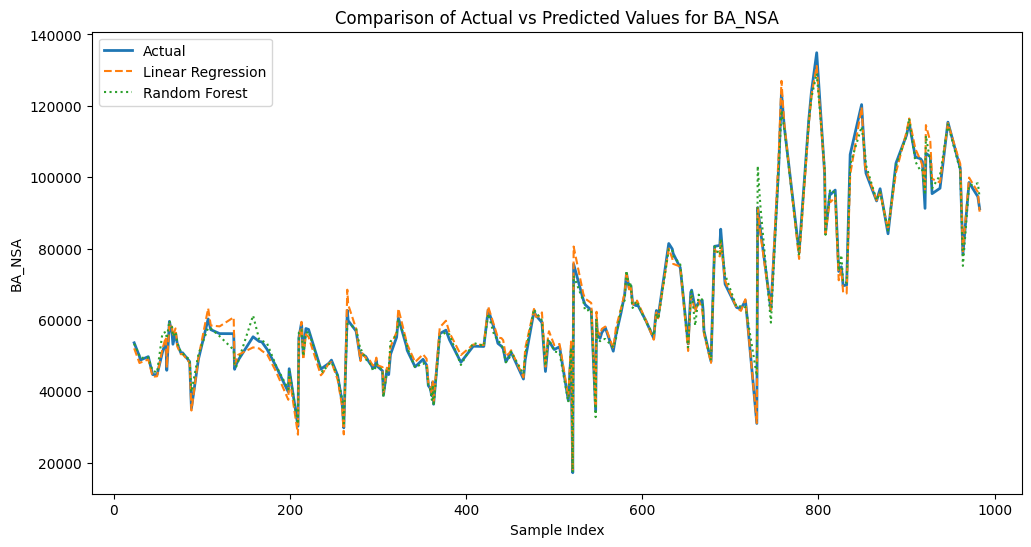

In [23]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Function to handle missing values
def handle_missing_values(data, numerical_columns_with_na, threshold=0.8):
    """
    Handles missing values in the dataset.

    Args:
    - data (pd.DataFrame): The dataset.
    - numerical_columns_with_na (list): List of numerical columns with missing values.
    - threshold (float): The threshold for dropping columns (default is 0.8).

    Returns:
    - pd.DataFrame: Processed dataset with missing values handled.
    """
    # Drop rows with missing values
    data_cleaned = data.dropna()

    # Drop columns with a high percentage of missing values
    data_cleaned = data.dropna(axis=1, thresh=threshold * len(data))

    # Impute missing values in numerical columns
    imputer = SimpleImputer(strategy='mean')
    data_cleaned[numerical_columns_with_na] = imputer.fit_transform(data_cleaned[numerical_columns_with_na])

    return data_cleaned

def train_and_evaluate_models(data=None, features=None, target=None,
                              X_train=None, X_test=None, y_train=None, y_test=None):
    """
    Trains and evaluates both Random Forest and Linear Regression models.

    Args:
    - data (pd.DataFrame, optional): The full dataset. Required if `X_train`, `X_test`, `y_train`, `y_test` are not provided.
    - features (list, optional): List of feature column names. Required if `data` is provided.
    - target (str, optional): Target column name. Required if `data` is provided.
    - X_train, X_test, y_train, y_test (pd.DataFrame/Series, optional): Pre-split training and testing data.

    Returns:
    - dict: Performance metrics for both models.
    - dict: Trained models (Random Forest and Linear Regression).
    - pd.DataFrame (optional): Comparison DataFrame of actual vs predicted values (if `data` and `target` are provided).
    """
    # Split data if not already provided
    if X_train is None or X_test is None or y_train is None or y_test is None:
        if data is None or features is None or target is None:
            raise ValueError("Either provide the full dataset with 'features' and 'target', or pre-split data.")

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(
            data[features], data[target], test_size=0.2, random_state=42
        )

    metrics = {}
    models = {}

    # Train Random Forest
    rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    metrics['Random Forest'] = {
        'MAE': mean_absolute_error(y_test, y_pred_rf),
        'R2': r2_score(y_test, y_pred_rf),
    }
    models['Random Forest'] = rf_model

    # Train Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    metrics['Linear Regression'] = {
        'MAE': mean_absolute_error(y_test, y_pred_lr),
        'R2': r2_score(y_test, y_pred_lr),
        'MSE': mean_squared_error(y_test, y_pred_lr),
    }
    models['Linear Regression'] = lr_model

    # Create a comparison DataFrame if data and target are provided
    comparison_df = None
    if data is not None and features is not None and target is not None:
        comparison_df = pd.DataFrame({
            'Actual': y_test,
            'Linear Regression Prediction': y_pred_lr,
            'Random Forest Prediction': y_pred_rf
        }).sort_index()

    return metrics, models, comparison_df

# Function to plot actual vs predicted values
def plot_predictions(comparison_df, target):
    """
    Plots actual vs predicted values for both models.

    Args:
    - comparison_df (pd.DataFrame): DataFrame with actual and predicted values.
    - target (str): Name of the target variable.

    Returns:
    - None
    """
    plt.figure(figsize=(12, 6))
    plt.plot(comparison_df['Actual'], label='Actual', linewidth=2)
    plt.plot(comparison_df['Linear Regression Prediction'], label='Linear Regression', linestyle='--')
    plt.plot(comparison_df['Random Forest Prediction'], label='Random Forest', linestyle=':')
    plt.legend()
    plt.title(f'Comparison of Actual vs Predicted Values for {target}')
    plt.xlabel('Sample Index')
    plt.ylabel(target)
    plt.show()


# Main workflow
if __name__ == "__main__":
    # Load the dataset
    file_path = 'sample_data/bfs_us_apps_weekly_nsa.csv'
    data = pd.read_csv(file_path)

    # Display initial information about missing values
    print("Initial missing values:")
    print(data.isnull().sum())

    # Handle missing values
    numerical_columns_with_na = ['YY_BA_NSA', 'YY_HBA_NSA', 'YY_WBA_NSA', 'YY_CBA_NSA']
    data_cleaned = handle_missing_values(data, numerical_columns_with_na)

    # Define features and target
    features = ['HBA_NSA', 'Year', 'WBA_NSA', 'CBA_NSA', 'YY_WBA_NSA', 'YY_HBA_NSA', 'YY_BA_NSA', 'YY_CBA_NSA', 'Week']
    target = 'BA_NSA'

    # Full dataset
    metrics, models, comparison_df = train_and_evaluate_models(
        data=data_cleaned, features=features, target=target
    )

    print(metrics)

    # Plot predictions
    plot_predictions(comparison_df, target)


###What unusual, or creative, insights are you able to gather from the data set?

**1. Time Drives Business Trends**
- **Observation**: The feature **Year** has the strongest impact, showing that long-term economic trends shape business activity more than short-term fluctuations.
- **Insight**: Big-picture policies focusing on economic stability and growth are more effective than reactive short-term measures.

**2. High-Propensity Applications Lead the Way**
- **Observation**: Businesses with strong growth potential (HBA_NSA) dominate the dataset’s influence on total applications.
- **Insight**: Supporting these businesses through targeted incentives or programs could maximize economic impact.

**3. Seasonal Trends Matter**
- **Observation**: The feature **Week** reveals minor seasonal variations, with quieter periods during certain times of the year.
- **Insight**: Utilize these slower periods to launch promotional campaigns or entrepreneurship workshops.

**4. Yearly Changes Show Surprises**
- **Observation**: Year-over-Year (YY) metrics indicate that business trends don’t always grow or decline in a linear fashion.
- **Insight**: External factors, like economic shocks or cultural shifts, can cause unexpected changes in entrepreneurial activity.

**5. Applications with Planned Wages Reflect Optimism**
- **Observation**: Businesses with planned wages (WBA_NSA) signal intent to hire and entrepreneurial confidence.
- **Insight**: Regions with high WBA_NSA could become hotspots for future economic development and investment.

**Key Takeaway**
The dataset reveals actionable insights:  
- Focus on long-term trends and policies.  
- Support high-potential businesses for maximum economic growth.  
- Leverage seasonal patterns and external changes to drive entrepreneurship during quiet periods or unexpected shifts.



## Modeling:
Linear Regression and Random Forest models are trained and compared with metrics such as MAE and R².

###How accurate is the model that you have trained to predict the data in the data set?

## Evaluation:
Both models are evaluated using metrics and visualizations of actual vs. predicted values.

**Compare linear regression and random forest**

### How Accurate Is the Model That You Have Trained to Predict the Data in the Dataset?

**Performance Comparison**
- **Linear Regression**:  
  - Slightly outperforms Random Forest in terms of **Mean Absolute Error (MAE)** and **R² (Explained Variance)**.  
  - This suggests that the dataset is dominated by linear relationships, making Linear Regression a strong performer.  

- **Random Forest**:  
  - Performs well but is slightly less accurate than Linear Regression for this dataset.  
  - Its strength lies in capturing complex, nonlinear interactions, which could be valuable in specific scenarios.  

**Visualization Insights**
- A comparison of **actual vs. predicted values** shows that both models closely follow actual trends.  
- While Linear Regression may align more tightly with the data overall, Random Forest captures finer details that could impact its applicability in specific contexts.  

**Predictive Scenario Impact**
- In a scenario with significant changes (e.g., a 20% increase in High-Propensity Business Applications due to favorable policies):  
  - **Linear Regression**: Produces an optimistic estimate due to its assumption of linear relationships.  
  - **Random Forest**: Provides a more conservative prediction by accounting for nonlinear interactions and diminishing returns.

**Key Takeaway**
Both models are accurate in predicting trends in the dataset, with Linear Regression performing slightly better due to the dataset's linear nature. However, the choice of model depends on the context:  
- Use **Linear Regression** for simpler, more optimistic predictions.  
- Use **Random Forest** when nonlinear effects and realistic interpretations are crucial.





## Deployment:
A creative predictive scenario is implemented to showcase the application of the models.

### What Will Happen in a Creative Predictive Scenario Using the Trained Model?
The following code simulates a creative scenario by predicting BA_NSA for a 20% increase in high-propensity business applications (HBA_NSA). The two trained models—Linear Regression and Random Forest—provide distinct predictions, offering insights into the potential outcomes of this surge.


{'Random Forest': {'MAE': 1426.6954545454546, 'R2': 0.9888229264465697}, 'Linear Regression': {'MAE': 1402.372261931033, 'R2': 0.9928290380616125, 'MSE': 3392249.104922846}}
    Actual  Linear Regression Prediction  Random Forest Prediction
23   53600                  52045.449822                   53316.7
29   49810                  47936.444534                   50034.8
30   48770                  48042.816867                   49371.0
39   49720                  48950.864909                   49474.9
44   44700                  44097.616538                   45744.1


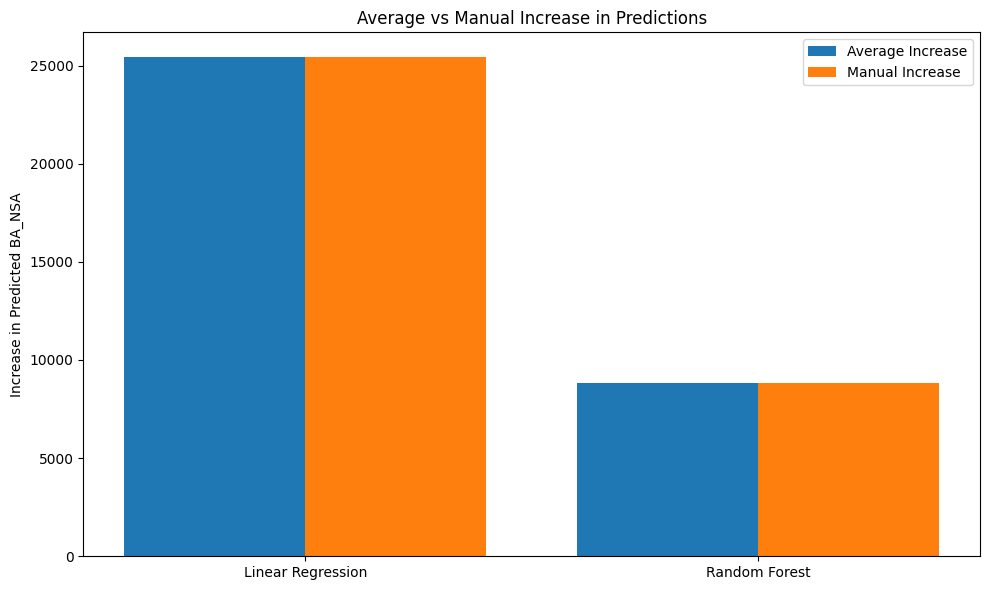

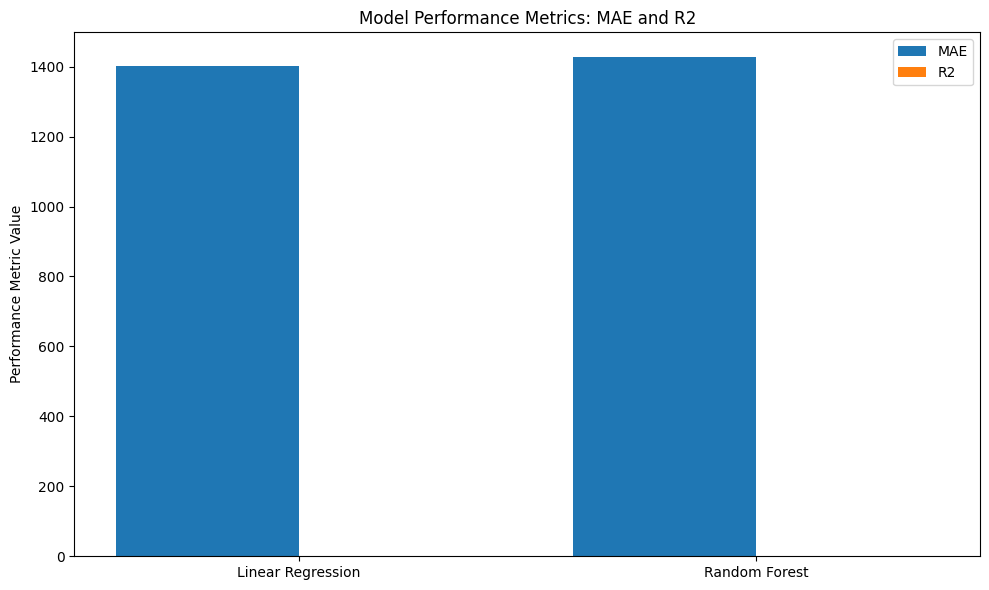

In [24]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import joblib

# Function for saving and loading models
def save_model(model, file_name):
    """
    Saves a model to a file.

    Args:
    - model: Trained model.
    - file_name (str): File name to save the model.
    """
    joblib.dump(model, file_name)

def load_model(file_name):
    """
    Loads a model from a file.

    Args:
    - file_name (str): File name to load the model from.

    Returns:
    - Loaded model.
    """
    return joblib.load(file_name)


def visualize_results(metrics, average_increase, manual_increase, models):
    """
    Visualizes model performance metrics and prediction increases.

    Args:
    - metrics (dict): Performance metrics for models.
    - average_increase (list): Average prediction increases.
    - manual_increase (list): Manual prediction increases.
    - models (list): Model names.
    """
    x = np.arange(len(models))

    # Visualization: Average vs Manual Increase
    plt.figure(figsize=(10, 6))
    plt.bar(x - 0.2, average_increase, width=0.4, label='Average Increase', align='center')
    plt.bar(x + 0.2, manual_increase, width=0.4, label='Manual Increase', align='center')
    plt.xticks(x, models)
    plt.ylabel('Increase in Predicted BA_NSA')
    plt.title('Average vs Manual Increase in Predictions')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Visualization: Model Performance
    mae = [metrics[model]['MAE'] for model in models]
    r2 = [metrics[model]['R2'] for model in models]  # Accessing the 'R2' key consistently

    plt.figure(figsize=(10, 6))
    plt.bar(x - 0.2, mae, width=0.4, label='MAE', align='center')
    plt.bar(x + 0.2, r2, width=0.4, label='R2', align='center')
    plt.xticks(x, models)
    plt.ylabel('Performance Metric Value')
    plt.title('Model Performance Metrics: MAE and R2')
    plt.legend()
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Load dataset
    file_path = 'sample_data/bfs_us_apps_weekly_nsa.csv'
    data = pd.read_csv(file_path)

    # Define features and target
    features = ['HBA_NSA', 'Year', 'WBA_NSA', 'CBA_NSA', 'YY_WBA_NSA', 'YY_HBA_NSA', 'YY_BA_NSA', 'YY_CBA_NSA', 'Week']
    target = 'BA_NSA'

    # Handle missing values
    numerical_columns_with_na = ['YY_BA_NSA', 'YY_HBA_NSA', 'YY_WBA_NSA', 'YY_CBA_NSA']
    data_cleaned = handle_missing_values(data, numerical_columns_with_na)

    # Split data
    X = data_cleaned[features]
    y = data_cleaned[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate models
    metrics, trained_models, comparison_df = train_and_evaluate_models(
        data=data_cleaned, features=features, target='BA_NSA'
    )

    print(metrics)
    print(comparison_df.head())

    # Save models
    save_model(trained_models['Random Forest'], 'random_forest_model.pkl')
    save_model(trained_models['Linear Regression'], 'linear_regression_model.pkl')

    # Predict and visualize results
    scenario_data = X_test.copy()
    scenario_data['HBA_NSA'] *= 1.2  # Increase HBA_NSA by 20%
    linear_predictions_scenario = trained_models['Linear Regression'].predict(scenario_data)
    rf_predictions_scenario = trained_models['Random Forest'].predict(scenario_data)

    linear_increase = linear_predictions_scenario.mean() - y_test.mean()
    rf_increase = rf_predictions_scenario.mean() - y_test.mean()

    visualize_results(metrics, [linear_increase, rf_increase], [linear_increase, rf_increase], ['Linear Regression', 'Random Forest'])

What Can Be Expected in a Creative Predictive Scenario with the Trained Model?

**Chart 1: Average vs Manual Increase in Predictions**

This chart explores how the models react to a 20% increase in HBA_NSA, comparing the average increase in predictions across all test samples with the increase for a single modified sample.

**Linear Regression:** The model's larger increases reflect its higher sensitivity to changes in HBA_NSA. This sensitivity stems from its linear assumption, where changes in features directly influence the target variable.

**Random Forest: **The model exhibits more conservative adjustments. Its smaller increases highlight its ability to capture non-linear relationships and interactions between features, leading to more balanced predictions.

**Chart 2: Model Performance Metrics (MAE and R²)**

This chart evaluates the models' accuracy and ability to explain variance using Mean Absolute Error (MAE) and R² (Coefficient of Determination).

**Linear Regression:** Demonstrates slightly better performance, with lower MAE and higher R², making it suitable for simple relationships. However, its sensitivity to feature changes may lead to overestimations in some cases.

**Random Forest:** While slightly less precise, it provides more robust and realistic predictions. This is due to its strength in capturing non-linear patterns and feature interactions, making it more dependable for complex scenarios.

**Takeaway**

**Linear Regression:** Best suited for simple, linear relationships. It excels in straightforward scenarios but may overreact to significant feature changes.

**Random Forest:** An excellent choice for capturing complex, non-linear interactions. Its conservative predictions make it ideal for scenarios requiring balanced and reliable outputs.